# 8

# In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

# (a): TODO Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector ε of length n = 100. 

In [285]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import (Stepwise,sklearn_selected,sklearn_selection_path,poly)


from l0bnb import fit_path

In [286]:
rng=np.random.default_rng(1)

x=rng.normal(0,1,size=100)

x

array([ 3.45584192e-01,  8.21618144e-01,  3.30437076e-01, -1.30315723e+00,
        9.05355867e-01,  4.46374572e-01, -5.36953235e-01,  5.81118104e-01,
        3.64572396e-01,  2.94132497e-01,  2.84222413e-02,  5.46712987e-01,
       -7.36454087e-01, -1.62909948e-01, -4.82119313e-01,  5.98846213e-01,
        3.97221075e-02, -2.92456751e-01, -7.81908462e-01, -2.57192241e-01,
        8.14218052e-03, -2.75602905e-01,  1.29406381e+00,  1.00672432e+00,
       -2.71116248e+00, -1.88901325e+00, -1.74772092e-01, -4.22190412e-01,
        2.13642997e-01,  2.17321931e-01,  2.11783876e+00, -1.11202076e+00,
       -3.77605007e-01,  2.04277161e+00,  6.46702996e-01,  6.63063372e-01,
       -5.14006372e-01, -1.64807517e+00,  1.67464744e-01,  1.09014088e-01,
       -1.22735205e+00, -6.83226662e-01, -7.20436797e-02, -9.44751623e-01,
       -9.82699679e-02,  9.54830275e-02,  3.55862371e-02, -5.06291658e-01,
        5.93748072e-01,  8.91166954e-01,  3.20848305e-01, -8.18230227e-01,
        7.31652284e-01, -

In [287]:
epsilon=rng.normal(0,1,size=100)
epsilon

array([-6.51281012e-01,  8.62444796e-01, -1.25592084e-01,  6.69153241e-01,
        1.21884361e+00,  3.82929583e-01, -8.75721143e-01, -1.51431863e+00,
        1.75338412e+00, -1.11292193e-01, -6.88564948e-01,  1.44257088e-01,
       -1.91411330e-01,  8.52142264e-01,  3.39281824e-02,  1.37495836e-02,
       -7.14579721e-01,  4.69568099e-01, -1.03386672e+00,  6.65889440e-01,
        1.52393751e+00, -1.52468604e+00, -2.46622923e+00,  6.16878755e-01,
        2.54789782e+00, -1.00092485e+00, -1.25069576e+00,  5.88968934e-01,
       -8.40721590e-01, -5.06025484e-01, -3.48117467e-01,  5.32002086e-01,
       -4.05302361e-01,  2.77882840e-01, -1.76533259e-01, -8.44671104e-01,
       -3.19826258e-01, -9.50399665e-01,  6.51498587e-03, -1.12386623e+00,
       -1.09289437e+00,  1.45696182e+00, -5.31842203e-02, -5.39020255e-02,
        5.11536420e-01, -4.20857003e-01, -2.28535367e-01,  4.25148735e-01,
        2.82415842e-01, -1.15929673e+00,  8.33342597e-01, -5.90434943e-01,
       -1.05607895e+00, -

# (b) TODO Generate a response vector Y of length n = 100 according to
the model 
$$
Y=\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\epsilon
$$
where $\beta_0,\beta_1,\beta_2,\beta_3$ are constants of your choice.

In [288]:
beta_0=1
beta_1=2
beta_2=3
beta_3=4

Y=beta_0+beta_1*x+beta_2*x**2+beta_3*x**3+epsilon

Y

array([ 1.56326299e+00,  7.74940446e+00,  2.00716798e+00, -4.69468920e+00,
        9.45693251e+00,  3.22919050e+00, -7.03926084e-01,  2.44598260e+00,
        4.07509370e+00,  1.83830080e+00,  3.70794847e-01,  3.78800764e+00,
       -6.34932209e-01,  1.58864703e+00,  3.18753267e-01,  4.14631759e+00,
        3.69848733e-01,  1.04119103e+00, -1.67571654e+00,  1.28189765e+00,
        2.54042292e+00, -9.31756801e-01,  1.48138649e+01,  1.07520445e+01,
       -5.95357575e+01, -2.00366389e+01, -5.29957943e-01,  9.78309455e-01,
        7.62499908e-01,  1.11136028e+00,  5.63393518e+01, -2.48272471e+00,
        5.18801911e-02,  5.19794296e+01,  4.45341586e+00,  3.96648605e+00,
       -9.84385275e-02, -1.30037839e+01,  1.44436362e+00,  1.34996287e-01,
       -5.42391777e+00,  1.21518731e+00,  8.16803585e-01, -1.63871190e+00,
        1.34017148e+00,  8.00942156e-01,  8.46616510e-01,  6.62445668e-01,
        4.36479442e+00,  6.83655549e+00,  2.91598727e+00, -1.40961614e+00,
        4.57982877e+00, -

# (c) TODO Use forward stepwise selection in order to select a model containing the predictors X, X2, . . . , X10. What is the model obtained according to Cp? Report the coefficients of the model obtained.

In [289]:
def nCp(sigma2,estimator,X,Y):
    n,p=X.shape
    Yhat=estimator.predict(X)
    RSS=np.sum((Y-Yhat)**2)

    return -(RSS+2*p*sigma2)/n

In [290]:
sigma2=OLS(Y,x).fit().scale
sigma2

49.629677128385396

In [291]:
X_poly=pd.DataFrame()

for i in range(1,11):
    X_poly[f'x{i}']=x**i

X_poly

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.345584,0.119428,0.041273,0.014263,4.929119e-03,1.703426e-03,5.886770e-04,2.034375e-04,7.030477e-05,2.429622e-05
1,0.821618,0.675056,0.554639,0.455701,3.744123e-01,3.076239e-01,2.527494e-01,2.076635e-01,1.706201e-01,1.401846e-01
2,0.330437,0.109189,0.036080,0.011922,3.939525e-03,1.301765e-03,4.301515e-04,1.421380e-04,4.696766e-05,1.551986e-05
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236e+00,4.897573e+00,-6.382308e+00,8.317150e+00,-1.083855e+01,1.412434e+01
4,0.905356,0.819669,0.742092,0.671858,6.082703e-01,5.507011e-01,4.985804e-01,4.513927e-01,4.086711e-01,3.699927e-01
...,...,...,...,...,...,...,...,...,...,...
95,-2.250854,5.066345,-11.403604,25.667851,-5.777459e+01,1.300422e+02,-2.927060e+02,6.588386e+02,-1.482950e+03,3.337904e+03
96,-0.138655,0.019225,-0.002666,0.000370,-5.124869e-05,7.105904e-06,-9.852714e-07,1.366131e-07,-1.894214e-08,2.626428e-09
97,0.033000,0.001089,0.000036,0.000001,3.913601e-08,1.291492e-09,4.261938e-11,1.406444e-12,4.641280e-14,1.531627e-15
98,-1.425349,2.031620,-2.895767,4.127478,-5.883097e+00,8.385466e+00,-1.195222e+01,1.703608e+01,-2.428236e+01,3.461083e+01


In [292]:
design=MS(X_poly.columns).fit(X_poly)

design

,terms,"Index(['x1', ...type='object')"
,intercept,True
,categorical_features,None
,categorical_encoders,{}


In [293]:
neg_Cp=partial(nCp,sigma2)

In [294]:
strategy=Stepwise.first_peak(
    design,
    direction='forward',
    max_terms=len(design.terms)
)


In [295]:
data_Cp=sklearn_selected(OLS,strategy,scoring=neg_Cp)
data_Cp.fit(X_poly,Y)

In [296]:
print("Selected features: ",data_Cp.selected_state_)


Selected features:  ('x1', 'x2', 'x3')


In [297]:
coefficients=data_Cp.results_.params
print("Coefficients: ",coefficients)

Coefficients:  intercept    0.942803
x1           2.114584
x2           2.952906
x3           3.935700
dtype: float64


In [298]:
print("Model Summary",data_Cp.results_.summary())

Model Summary                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     4333.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):          2.64e-102
Time:                        14:29:29   Log-Likelihood:                -140.47
No. Observations:                 100   AIC:                             288.9
Df Residuals:                      96   BIC:                             299.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9428      0.120      

In [299]:
strategy_path=Stepwise.fixed_steps(design,len(design.terms),direction='forward')
full_path=sklearn_selection_path(OLS,strategy=strategy_path,scoring=neg_Cp)
full_path.fit(X_poly,Y)

In [300]:
# 获取每一步的预测结果
Yhat_path = full_path.predict(X_poly)  # shape: (n_samples, n_steps)

# 计算每一步的 Cp
n = len(Y)
path_scores = []

for step in range(Yhat_path.shape[1]):
    # 获取当前步骤的预测
    Yhat_step = Yhat_path[:, step]
    
    # 计算 RSS
    RSS = np.sum((Y - Yhat_step)**2)
    
    # 获取当前步骤选择的特征数量（包括截距）
    # 需要从 full_path 获取当前步骤的状态
    # 或者通过计算非零系数来推断
    
    # 计算 Cp（注意：这里 p 包括截距，所以是 step+1）
    p = step + 1  # 假设每一步增加一个特征
    Cp = (RSS + 2 * p * sigma2) / n
    
    path_scores.append(Cp)

# 打印结果
for step, cp in enumerate(path_scores):
    print(f"Step {step+1}: Cp = {cp:.4f}")

Step 1: Cp = 133.5702
Step 2: Cp = 13.8452
Step 3: Cp = 5.2376
Step 4: Cp = 4.9422
Step 5: Cp = 5.8347
Step 6: Cp = 6.8191
Step 7: Cp = 7.8046
Step 8: Cp = 8.7931
Step 9: Cp = 9.7828
Step 10: Cp = 10.7708
Step 11: Cp = 11.7536


# (d) TODO Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [301]:
strategy=Stepwise.first_peak(
    design,
    direction='backward',
    max_terms=len(design.terms)
)

In [302]:
data_Cp=sklearn_selected(OLS,strategy,scoring=neg_Cp)
data_Cp.fit(X_poly,Y)

In [303]:
print("Selected features: ",data_Cp.selected_state_)


Selected features:  ()


In [304]:
coefficients=data_Cp.results_.params
print("Coefficients: ",coefficients)

Coefficients:  intercept    1.333219
dtype: float64


In [305]:
print("Model Summary",data_Cp.results_.summary())

Model Summary                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 14 Nov 2025   Prob (F-statistic):                nan
Time:                        14:29:29   Log-Likelihood:                -386.25
No. Observations:                 100   AIC:                             774.5
Df Residuals:                      99   BIC:                             777.1
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3332      1.157      

In [306]:
strategy_path=Stepwise.fixed_steps(design,len(design.terms),direction='backward')
full_path=sklearn_selection_path(OLS,strategy=strategy_path,scoring=neg_Cp)
full_path.fit(X_poly,Y)

In [307]:
# 获取每一步的预测结果
Yhat_path = full_path.predict(X_poly)  # shape: (n_samples, n_steps)

# 计算每一步的 Cp
n = len(Y)
path_scores = []

for step in range(Yhat_path.shape[1]):
    # 获取当前步骤的预测
    Yhat_step = Yhat_path[:, step]
    
    # 计算 RSS
    RSS = np.sum((Y - Yhat_step)**2)
    
    # 获取当前步骤选择的特征数量（包括截距）
    # 需要从 full_path 获取当前步骤的状态
    # 或者通过计算非零系数来推断
    
    # 计算 Cp（注意：这里 p 包括截距，所以是 step+1）
    p = step + 1  # 假设每一步增加一个特征
    Cp = (RSS + 2 * p * sigma2) / n
    
    path_scores.append(Cp)

# 打印结果
for step, cp in enumerate(path_scores):
    print(f"Step {step+1}: Cp = {cp:.4f}")

Step 1: Cp = 133.5702


# <small> Obviously, backward removes all features. </small>

# (e) TODO Now fit a lasso model to the simulated data, again using X, X2. . . , X10 as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the sults obtained.

In [308]:
X_poly.shape

(100, 10)

In [309]:
Xs=(X_poly-X_poly.mean(axis=0))/X_poly.std(axis=0)
Xs.shape

(100, 10)

In [310]:
lambdas=10**np.linspace(8,-2,100)/Y.std()

soln_array=skl.ElasticNet.path(Xs,Y,l1_ratio=1,alphas=lambdas)[1]

soln_array.shape

/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.652e+00, tolerance: 1.344e+00
  model = cd_fast.enet_coordinate_descent_gram(


(10, 100)

In [311]:
soln_array

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [312]:
soln_path=pd.DataFrame(soln_array.T,columns=X_poly.columns,index=-np.log(lambdas))

soln_path.index.name='negative log(lambda)'

soln_path

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
negative log(lambda),,,,,,,,,,
-15.977097,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.0,-0.000000,0.0,-0.000000
-15.744512,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.0,-0.000000,0.0,-0.000000
-15.511928,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.0,-0.000000,0.0,-0.000000
-15.279344,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.0,-0.000000,0.0,-0.000000
-15.046759,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.0,-0.000000,0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...
6.118417,1.663083,3.451390,11.266889,-0.399236,0.804848,0.0,0.0,0.000000,-0.0,1.102465
6.351001,1.676784,3.466117,11.202242,-0.434935,0.884542,0.0,0.0,0.000000,-0.0,1.153546
6.583586,1.688831,3.478268,11.144887,-0.468721,0.954737,0.0,0.0,0.020046,-0.0,1.180873


<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_3095517/1241712015.py:3: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


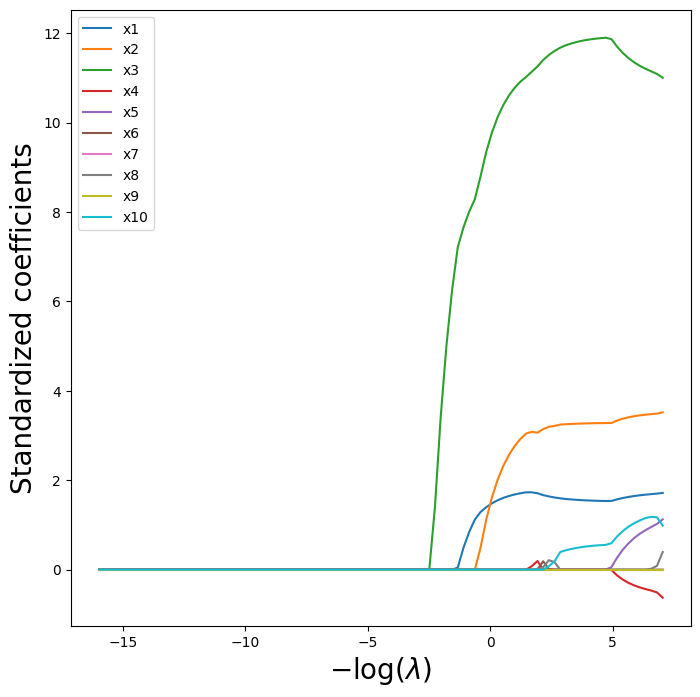

In [313]:
path_fig , ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

# Grid search of lambda

In [314]:
lasso=skl.ElasticNet(l1_ratio=1)
scaler=StandardScaler(with_mean=True,with_std=True)

pipe=Pipeline([('scaler',scaler),('lasso',lasso)])

pipe.fit(X_poly,Y)

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,1.0
,l1_ratio,1
,fit_intercept,True
,precompute,False


In [315]:
param_grid={'lasso__alpha':lambdas}
validation=skm.ShuffleSplit(n_splits=1,test_size=0.5,random_state=0)
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=validation,scoring='neg_mean_squared_error')

grid.fit(X_poly,Y)

grid.best_params_['lasso__alpha']
grid.best_estimator_


/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.178e-01, tolerance: 1.499e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.382e-01, tolerance: 1.499e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.00888926586343231
,l1_ratio,1
,fit_intercept,True
,precompute,False


In [316]:
K=5
kfold=skm.KFold(K,random_state=0,shuffle=True)

In [317]:
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=kfold,scoring='neg_mean_squared_error')

grid.fit(X_poly,Y)
grid.best_params_['lasso__alpha']
grid.best_estimator_

/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+00, tolerance: 2.251e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.382e-01, tolerance: 2.251e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.0035061096282501952
,l1_ratio,1
,fit_intercept,True
,precompute,False


In [318]:
# 诊断代码 - 检查数据
print("MSE值范围:")
print(f"最小值: {-grid.cv_results_['mean_test_score'].max()}")
print(f"最大值: {-grid.cv_results_['mean_test_score'].min()}")
print(f"是否有NaN: {np.isnan(-grid.cv_results_['mean_test_score']).any()}")
print(f"是否有Inf: {np.isinf(-grid.cv_results_['mean_test_score']).any()}")

print("\nLambda范围:")
print(f"最小值: {-np.log(lambdas).min()}")
print(f"最大值: {-np.log(lambdas).max()}")

# 检查数据形状
print(f"\n数据形状: {grid.cv_results_['mean_test_score'].shape}")
print(f"Lambdas形状: {lambdas.shape}")

MSE值范围:
最小值: 1.1142555757414871
最大值: 133.9042164176509
是否有NaN: False
是否有Inf: False

Lambda范围:
最小值: 7.048754341184417
最大值: -15.977096588756039

数据形状: (100,)
Lambdas形状: (100,)


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_3095517/3353443062.py:6: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


Text(0, 0.5, 'Cross-validated MSE')

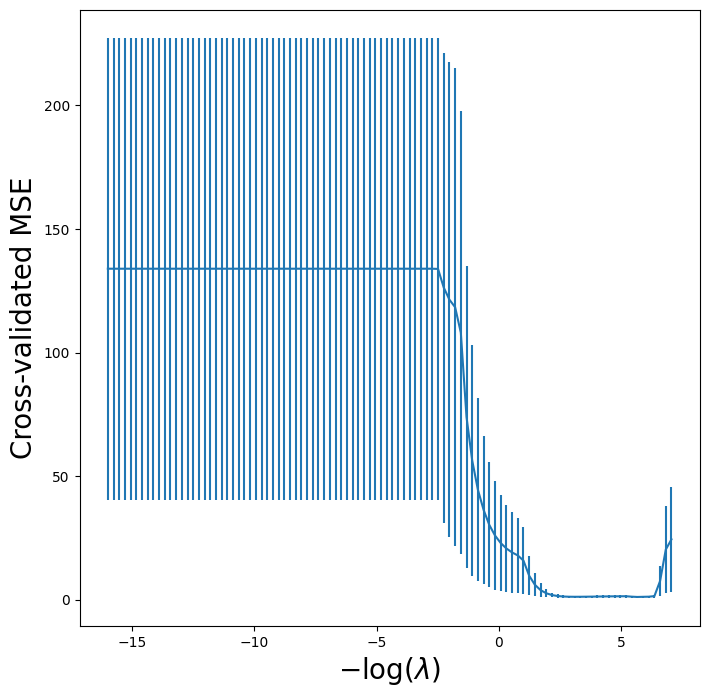

In [319]:
lasso_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
-grid.cv_results_['mean_test_score'],
yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
# ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)

In [320]:
grid_r2=skm.GridSearchCV(pipe,param_grid,cv=kfold)
grid_r2.fit(X_poly,Y)


/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+00, tolerance: 2.251e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.382e-01, tolerance: 2.251e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,estimator,Pipeline(step...l1_ratio=1))])
,param_grid,{'lasso__alpha': array([8.6849...68490126e-04])}
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_3095517/2204943169.py:6: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


Text(0, 0.5, 'Cross-validated $R^2$')

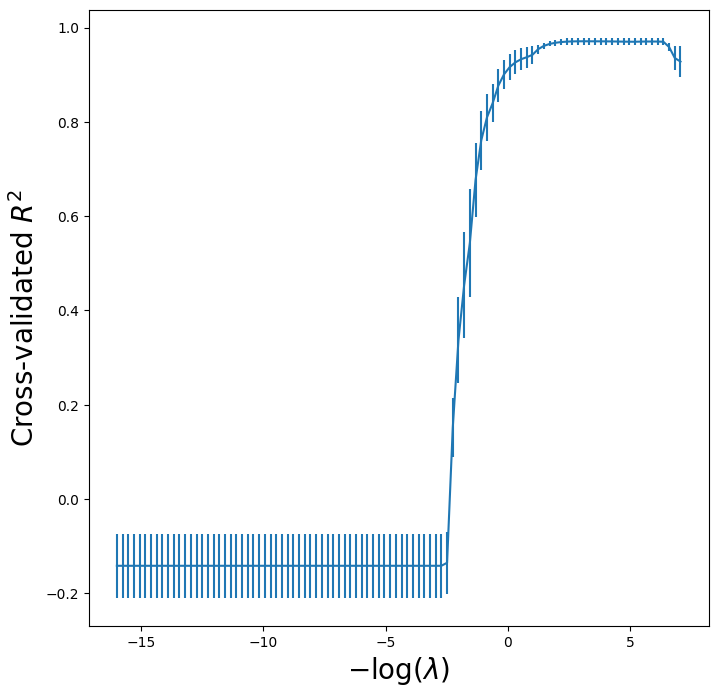

In [321]:
r2_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
grid_r2.cv_results_['mean_test_score'],
yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K)
)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated $R^2$', fontsize=20)

In [322]:
# 报告最优模型的系数估计
best_lasso = grid.best_estimator_.named_steps['lasso']
coefficients = pd.Series(best_lasso.coef_, index=X_poly.columns)
coefficients['intercept'] = best_lasso.intercept_

print("=" * 60)
print("最优Lasso模型结果")
print("=" * 60)
print(f"最优λ值: {grid.best_params_['lasso__alpha']:.6f}")
print(f"-log(λ): {-np.log(grid.best_params_['lasso__alpha']):.4f}")
print(f"\n系数估计:")
print(coefficients)
print(f"\n选择的变量 (非零系数):")
selected_vars = coefficients[coefficients != 0]
print(selected_vars)
print(f"\n真实模型系数: β₀=1, β₁=2, β₂=3, β₃=4")

最优Lasso模型结果
最优λ值: 0.003506
-log(λ): 5.6532

系数估计:
x1            1.664918
x2            3.357250
x3           11.165340
x4           -0.272564
x5            0.835530
x6           -0.000000
x7            0.000000
x8            0.000000
x9           -0.000000
x10           1.038695
intercept     1.333219
dtype: float64

选择的变量 (非零系数):
x1            1.664918
x2            3.357250
x3           11.165340
x4           -0.272564
x5            0.835530
x10           1.038695
intercept     1.333219
dtype: float64

真实模型系数: β₀=1, β₁=2, β₂=3, β₃=4


# (f) TODO Now generate a response vector Y according to the model
$$
Y=\beta_0+\beta_7X^7+\epsilon
$$
# and perform forward stepwise selection and the lasso. Discuss the results obtained.



In [323]:
beta_7=1

Y_new=beta_0+beta_7*x**7+epsilon

Y_new

array([ 3.49307665e-01,  2.11519420e+00,  8.74838067e-01, -4.71315432e+00,
        2.71742405e+00,  1.38646057e+00,  1.11409547e-01, -4.91939108e-01,
        2.75424014e+00,  8.88898266e-01,  3.11435052e-01,  1.15885584e+00,
        6.91093575e-01,  1.85213922e+00,  1.02787363e+00,  1.04136853e+00,
        2.85420279e-01,  1.46938511e+00, -2.12553079e-01,  1.66581500e+00,
        2.52393751e+00, -5.24806816e-01,  4.61077940e+00,  2.66490922e+00,
       -1.07313749e+03, -8.58320929e+01, -2.50700740e-01,  1.58657805e+00,
        1.59298725e-01,  4.93997410e-01,  1.91747285e+02, -5.70760652e-01,
        5.93603017e-01,  1.49713694e+02,  8.70774689e-01,  2.11677774e-01,
        6.70694371e-01, -3.29751175e+01,  1.00651868e+00, -1.23866045e-01,
       -4.28839776e+00,  2.38746680e+00,  9.46815770e-01,  2.74323455e-01,
        1.51153633e+00,  5.79143070e-01,  7.71464633e-01,  1.41662156e+00,
        1.30843034e+00,  2.87092307e-01,  1.83369262e+00,  1.64021447e-01,
        5.61572945e-02,  

In [324]:
X_poly

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.345584,0.119428,0.041273,0.014263,4.929119e-03,1.703426e-03,5.886770e-04,2.034375e-04,7.030477e-05,2.429622e-05
1,0.821618,0.675056,0.554639,0.455701,3.744123e-01,3.076239e-01,2.527494e-01,2.076635e-01,1.706201e-01,1.401846e-01
2,0.330437,0.109189,0.036080,0.011922,3.939525e-03,1.301765e-03,4.301515e-04,1.421380e-04,4.696766e-05,1.551986e-05
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236e+00,4.897573e+00,-6.382308e+00,8.317150e+00,-1.083855e+01,1.412434e+01
4,0.905356,0.819669,0.742092,0.671858,6.082703e-01,5.507011e-01,4.985804e-01,4.513927e-01,4.086711e-01,3.699927e-01
...,...,...,...,...,...,...,...,...,...,...
95,-2.250854,5.066345,-11.403604,25.667851,-5.777459e+01,1.300422e+02,-2.927060e+02,6.588386e+02,-1.482950e+03,3.337904e+03
96,-0.138655,0.019225,-0.002666,0.000370,-5.124869e-05,7.105904e-06,-9.852714e-07,1.366131e-07,-1.894214e-08,2.626428e-09
97,0.033000,0.001089,0.000036,0.000001,3.913601e-08,1.291492e-09,4.261938e-11,1.406444e-12,4.641280e-14,1.531627e-15
98,-1.425349,2.031620,-2.895767,4.127478,-5.883097e+00,8.385466e+00,-1.195222e+01,1.703608e+01,-2.428236e+01,3.461083e+01


In [325]:
sigma2=OLS(Y_new,x).fit().scale
sigma2

10170.941872631554

In [326]:
strategy=Stepwise.first_peak(
    design,
    direction='forward',
    max_terms=len(design.terms)
)


In [327]:
data_MSE=sklearn_selected(OLS,strategy,scoring=neg_Cp)
data_MSE.fit(X_poly,Y_new)
data_MSE.selected_state_

('x7',)

In [328]:
data_MSE.results_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.341e+06
Date:                Fri, 14 Nov 2025   Prob (F-statistic):          1.70e-204
Time:                        14:29:32   Log-Likelihood:                -139.12
No. Observations:                 100   AIC:                             282.2
Df Residuals:                      98   BIC:                             287.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9048      0.099      9.155      0.000       0.709       1.101
x7             0.9983      0.001   1158.014      0.000       0.997       1.000
==============================================================================
Omnibus:                        0.958   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.479
Skew:                          -0.035   Prob(JB):                        0.787
Kurtosis:                       3.332   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [329]:
lambdas=10**np.linspace(8,-2,100)/Y_new.std()

soln_array=skl.ElasticNet.path(Xs,Y_new,l1_ratio=1,alphas=lambdas)[1]

soln_array.shape

/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.568e+02, tolerance: 1.308e+02
  model = cd_fast.enet_coordinate_descent_gram(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.312e+02, tolerance: 1.308e+02
  model = cd_fast.enet_coordinate_descent_gram(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation

(10, 100)

In [330]:
soln_path=pd.DataFrame(soln_array.T,columns=X_poly.columns,index=-np.log(lambdas))

soln_path.index.name='negative log(lambda)'

soln_path

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
negative log(lambda),,,,,,,,,,
-13.686433,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
-13.453848,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
-13.221264,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
-12.988679,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
-12.756095,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...
8.409081,0.089128,0.042488,-1.357244,-1.052580,3.582926,0.699564,111.970393,0.571399,0.343620,-0.004182
8.641665,0.092231,0.076962,-1.371182,-1.230792,3.546359,0.896070,112.034013,0.615408,0.371159,-0.057261
8.874250,0.096574,0.112959,-1.396998,-1.417785,3.546188,1.112455,112.085410,0.670406,0.364659,-0.154653


<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_3095517/1241712015.py:3: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


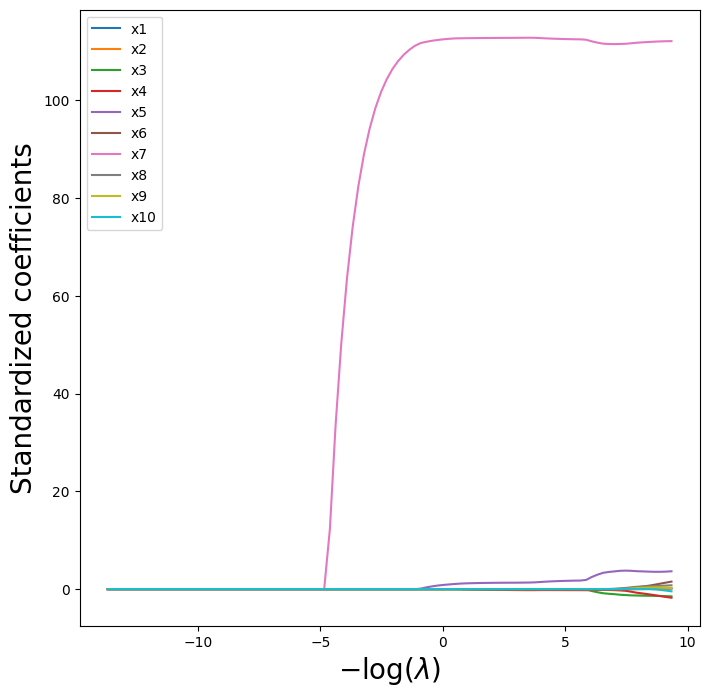

In [331]:
path_fig , ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

In [332]:
lasso=skl.ElasticNet(l1_ratio=1)
scaler=StandardScaler(with_mean=True,with_std=True)

pipe=Pipeline([('scaler',scaler),('lasso',lasso)])

pipe.fit(X_poly,Y_new)

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,1.0
,l1_ratio,1
,fit_intercept,True
,precompute,False


In [333]:
param_grid={'lasso__alpha':lambdas}
validation=skm.ShuffleSplit(n_splits=1,test_size=0.5,random_state=0)
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=validation,scoring='neg_mean_squared_error')

grid.fit(X_poly,Y_new)

grid.best_params_['lasso__alpha']
grid.best_estimator_


/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.645e-01, tolerance: 8.759e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+00, tolerance: 8.759e-01
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.18935442665691876
,l1_ratio,1
,fit_intercept,True
,precompute,False


In [334]:
K=5
kfold=skm.KFold(K,random_state=0,shuffle=True)

In [335]:
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=kfold,scoring='neg_mean_squared_error')

grid.fit(X_poly,Y_new)
grid.best_params_['lasso__alpha']
grid.best_estimator_

/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+00, tolerance: 1.076e+00
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.245e+00, tolerance: 1.076e+00
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.18935442665691876
,l1_ratio,1
,fit_intercept,True
,precompute,False


In [336]:
# 诊断代码 - 检查数据
print("MSE值范围:")
print(f"最小值: {-grid.cv_results_['mean_test_score'].max()}")
print(f"最大值: {-grid.cv_results_['mean_test_score'].min()}")
print(f"是否有NaN: {np.isnan(-grid.cv_results_['mean_test_score']).any()}")
print(f"是否有Inf: {np.isinf(-grid.cv_results_['mean_test_score']).any()}")

print("\nLambda范围:")
print(f"最小值: {-np.log(lambdas).min()}")
print(f"最大值: {-np.log(lambdas).max()}")

# 检查数据形状
print(f"\n数据形状: {grid.cv_results_['mean_test_score'].shape}")
print(f"Lambdas形状: {lambdas.shape}")

MSE值范围:
最小值: 2.256083076393714
最大值: 13159.81640411355
是否有NaN: False
是否有Inf: False

Lambda范围:
最小值: 9.339418390048817
最大值: -13.68643253989164

数据形状: (100,)
Lambdas形状: (100,)


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_3095517/3353443062.py:6: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


Text(0, 0.5, 'Cross-validated MSE')

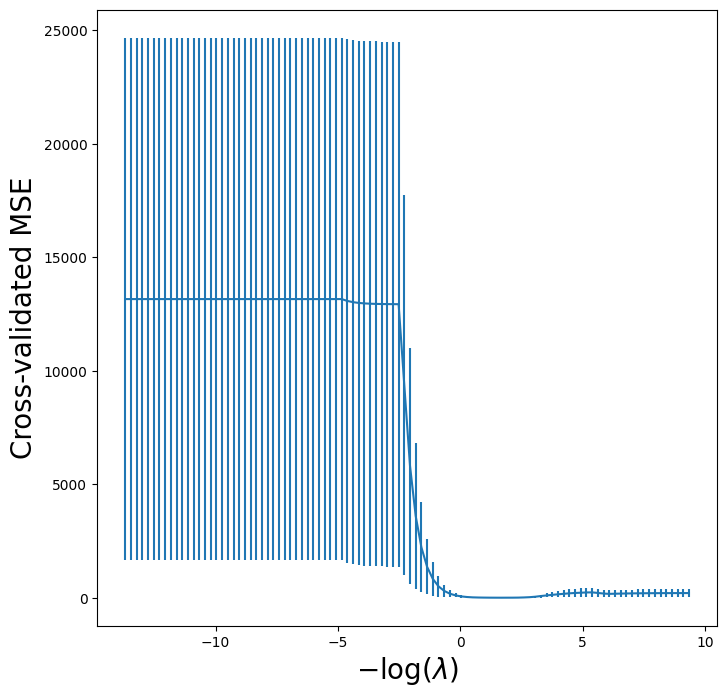

In [337]:
lasso_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
-grid.cv_results_['mean_test_score'],
yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
# ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)

In [338]:
grid_r2=skm.GridSearchCV(pipe,param_grid,cv=kfold)
grid_r2.fit(X_poly,Y_new)


/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+00, tolerance: 1.076e+00
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.245e+00, tolerance: 1.076e+00
  model = cd_fast.enet_coordinate_descent(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,estimator,Pipeline(step...l1_ratio=1))])
,param_grid,{'lasso__alpha': array([8.7890...78905392e-05])}
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_3095517/2204943169.py:6: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


Text(0, 0.5, 'Cross-validated $R^2$')

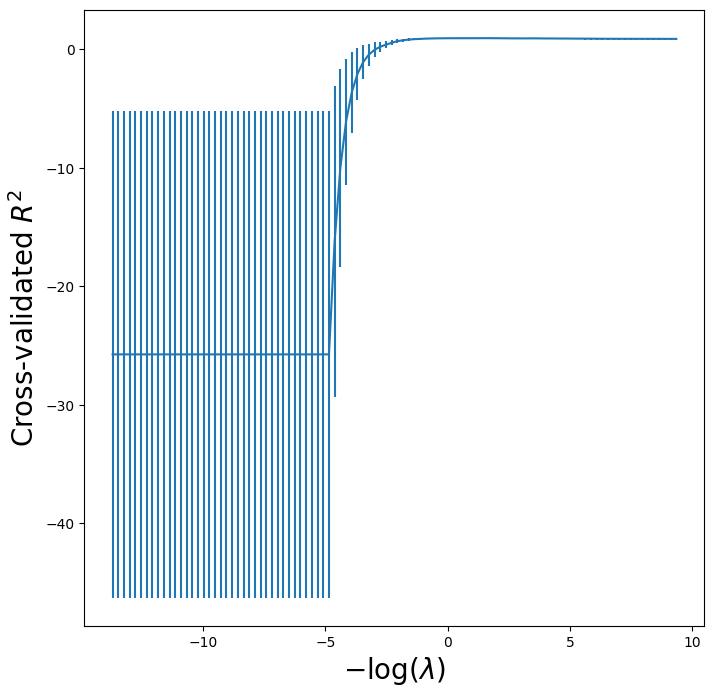

In [339]:
r2_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
grid_r2.cv_results_['mean_test_score'],
yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K)
)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated $R^2$', fontsize=20)

In [340]:
# 报告最优模型的系数估计
best_lasso = grid.best_estimator_.named_steps['lasso']
coefficients = pd.Series(best_lasso.coef_, index=X_poly.columns)
coefficients['intercept'] = best_lasso.intercept_

print("=" * 60)
print("最优Lasso模型结果")
print("=" * 60)
print(f"最优λ值: {grid.best_params_['lasso__alpha']:.6f}")
print(f"-log(λ): {-np.log(grid.best_params_['lasso__alpha']):.4f}")
print(f"\n系数估计:")
print(coefficients)
print(f"\n选择的变量 (非零系数):")
selected_vars = coefficients[coefficients != 0]
print(selected_vars)
print(f"\n真实模型系数: β₀=1, β7=1")

最优Lasso模型结果
最优λ值: 0.189354
-log(λ): 1.6641

系数估计:
x1           -0.281070
x2           -0.000000
x3            0.000000
x4           -0.000000
x5           16.289679
x6           -0.184192
x7           75.404812
x8           -0.000000
x9           22.346543
x10          -0.000000
intercept   -11.576214
dtype: float64

选择的变量 (非零系数):
x1           -0.281070
x5           16.289679
x6           -0.184192
x7           75.404812
x9           22.346543
intercept   -11.576214
dtype: float64

真实模型系数: β₀=1, β7=1


# 9

# In this exercise, we will predict the number of applications received using the other variables in the College data set.

# (a) TODO Split the data set into a training set and a test set

In [341]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model as skl
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.cross_decomposition import PLSRegression


In [342]:
College=load_data('College')
College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [343]:
y=College['Apps']
y

0       1660
1       2186
2       1428
3        417
4        193
       ...  
772     2197
773     1959
774     2097
775    10705
776     2989
Name: Apps, Length: 777, dtype: int64

In [344]:
X=College.drop(columns=['Apps'])
X

,Private,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [345]:
ohe=OneHotEncoder(drop='first',sparse_output=False)
private_encoded=ohe.fit_transform(X[['Private']])

X_private=pd.DataFrame(
    private_encoded,
    columns=ohe.get_feature_names_out(['Private']),
    index=X.index
)

X=pd.concat([X.drop(columns=['Private']),X_private],axis=1)

In [346]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [347]:
X_train

,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
436,3913,2181,29,57,12830,1658,5336,3344,800,3100,84,92,15.3,14,6433,48,0.0
230,813,248,40,64,850,80,15588,6174,500,1200,78,90,9.2,34,16623,77,1.0
118,5257,2301,37,65,11755,770,8116,3610,800,1618,82,88,18.0,17,7597,73,0.0
253,721,274,52,87,954,6,8800,3195,500,1200,82,99,13.1,26,8588,63,1.0
157,508,153,12,30,460,536,12292,4934,500,500,61,61,22.2,10,8643,72,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1245,526,81,96,1988,29,19629,5790,500,1200,94,99,9.0,64,22014,99,1.0
192,1256,853,43,79,3957,588,5401,3144,450,1888,72,75,19.3,4,5527,50,0.0
629,803,438,20,48,1906,344,6810,3970,450,1647,67,75,15.9,26,5712,59,0.0
559,2300,585,25,69,2022,926,12170,6172,480,800,79,79,13.0,30,7495,97,1.0


In [348]:
y_train

436    4522
230    1151
118    8065
253     823
157     585
       ... 
763    4186
192    1256
629    1208
559    3646
684    3281
Name: Apps, Length: 621, dtype: int64

# (b) TODO Fit a linear model using least squares on the training set, and report the test error obtained.

In [349]:
reg=skl.LinearRegression()

reg.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [350]:
reg.coef_

array([ 1.62366321e+00, -1.04438679e+00,  5.78795265e+01, -1.80142342e+01,
        7.20626050e-02,  5.64566068e-02, -7.68791048e-02,  1.71826538e-01,
        4.33611971e-02, -1.21706499e-02, -1.05851240e+01, -3.67247432e+00,
        6.31147427e+00, -6.85785367e-01,  5.15984953e-02,  8.78165549e+00,
       -5.42518702e+02])

In [351]:
reg.intercept_

-19.040232794692656

In [352]:
reg.score(X_test,y_test)

0.8699686889981196

In [353]:
y_pred=reg.predict(X_test)
test_mse=mean_squared_error(y_test,y_pred)

print("Test MSE: ",test_mse)

Test MSE:  1176083.9778028764


# (c) TODO Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [354]:
lambdas=np.logspace(-10,10,50)

ridge_cv=RidgeCV(alphas=lambdas,scoring='neg_mean_squared_error',cv=5)

ridge_cv.fit(X_train,y_train)

best_alpha=ridge_cv.alpha_

y_pred=ridge_cv.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

print(f"Best alpha: {best_alpha:.4f}")
print(f"Test MSE: {test_mse:.2f}")



Best alpha: 68.6649
Test MSE: 1173792.14


# (d) TODO Fit a lasso model on the training set, with λ chosen by cross validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [355]:
lambdas=np.logspace(-10,10,50)

lasso_cv=LassoCV(alphas=lambdas,cv=5,max_iter=100000)

lasso_cv.fit(X_train,y_train)

best_alpha=lasso_cv.alpha_

y_pred=lasso_cv.predict(X_test)
test_mse=mean_squared_error(y_test,y_pred)

print(f"Best alpha: {best_alpha:.4f}")
print(f"Test MSE: {test_mse:.2f}")


Best alpha: 68.6649
Test MSE: 1177895.24


/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.318e+08, tolerance: 6.992e+05
  model = cd_fast.enet_coordinate_descent_gram(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+08, tolerance: 8.929e+05
  model = cd_fast.enet_coordinate_descent_gram(
/home/zyli/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation

In [356]:
lasso_cv.coef_

array([ 1.63191309e+00, -1.06141689e+00,  5.58555801e+01, -1.71053038e+01,
        8.93861402e-02,  6.32342705e-02, -1.04454959e-01,  1.51252384e-01,
        7.17321319e-03, -1.44995832e-02, -7.96211451e+00, -1.09131323e+00,
        6.90409953e+00, -1.20036222e+00,  5.37295992e-02,  7.32034868e+00,
       -0.00000000e+00])

In [357]:
tol=1e-8
nonzero=np.sum(np.abs(lasso_cv.coef_)>tol)

nonzero

16

# (e) TODO Fit a PCR model on the training set, with M chosen by cross-validation. Report the test error obtained, along with the value of M selected by cross-validation.

In [358]:
pipe=Pipeline([
    ('scaler',StandardScaler(with_mean=True,with_std=True)),
    ('pca',PCA()),
    ('lr',skl.LinearRegression())
])

param_grid={'pca__n_components':np.arange(1,X_train.shape[1]+1)}

gcv=skm.GridSearchCV(pipe,param_grid=param_grid,cv=5)

gcv.fit(X_train,y_train)

best_m=gcv.best_params_['pca__n_components']

y_pred=gcv.predict(X_test)
test_mse=mean_squared_error(y_test,y_pred)

print(f"Best M: {best_m}")
print(f"Test MSE: {test_mse:.2f}")

    

Best M: 17
Test MSE: 1176083.98


# (f) TODO Fit a PLS model on the training set, with M chosen by cross validation. Report the test error obtained, along with the value of M selected by cross-validation.

In [359]:
pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('pls', PLSRegression())
])

param_grid = {'pls__n_components': np.arange(1, min(X_train.shape) + 1)}
gcv = skm.GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)
gcv.fit(X_train, y_train)

best_k = gcv.best_params_['pls__n_components']
test_mse = mean_squared_error(y_test, gcv.predict(X_test))

print(f"Best components: {best_k}")
print(f"Test MSE: {test_mse:.3f}")

Best components: 17
Test MSE: 1176083.978


# 10

# We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

# (a) TODO Generate a data set with p = 20 features, n = 1,000 observations, and an associated quantitative response vector generated according to the model
$$
Y=X\beta+\epsilon
$$

# where β has some elements that are exactly equal to zero.

In [360]:
import matplotlib.pyplot as plt

In [361]:
n=1000
p=20

X=rng.normal(0,1,size=(n,p))

beta=np.zeros(p)

X


array([[ 1.82843024,  2.02007337, -1.06477104, ..., -0.20689292,
        -0.333726  ,  0.05668995],
       [-0.29310222,  0.75321141, -0.32319593, ...,  0.77032208,
        -0.7010998 , -1.12618812],
       [ 0.09573071, -0.17847043,  0.202624  , ...,  0.07703242,
         0.44504128, -0.22907934],
       ...,
       [-0.35826522,  0.18246399,  0.35038622, ..., -0.28191355,
         0.27999589, -0.11138555],
       [ 1.47877084,  1.06188193, -1.96227525, ..., -0.03274745,
         0.3317526 ,  0.66944277],
       [ 0.17539041, -0.56714178, -1.04723671, ..., -1.19263958,
         0.00826847, -0.22357655]])

In [362]:
beta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [363]:
beta[:15]=rng.normal(0,1,size=15)

epsilon=rng.normal(0,1,size=n)


In [364]:
Y=X@beta+epsilon
Y.shape

(1000,)

In [365]:
X=pd.DataFrame(X)
X.columns=[f'x{i}' for i in range(p)]

In [366]:
X

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,1.828430,2.020073,-1.064771,0.372815,-0.673302,-0.023570,-1.265637,1.867146,-0.969180,-0.296084,0.501483,-0.647561,-0.239312,-0.563640,-0.133461,-1.170543,-0.437988,-0.206893,-0.333726,0.056690
1,-0.293102,0.753211,-0.323196,-0.136650,-0.664781,-0.526515,-1.264493,0.518785,-1.142518,-0.745856,0.359245,0.402573,-0.400115,-2.019266,0.420513,0.259563,-1.412381,0.770322,-0.701100,-1.126188
2,0.095731,-0.178470,0.202624,-1.605748,1.812230,-0.602659,-1.539659,0.618842,-0.354804,0.324858,-0.339608,-0.059740,0.245773,-0.746653,0.678740,-0.469900,-0.869687,0.077032,0.445041,-0.229079
3,-0.862520,0.619786,-1.760329,-1.030864,0.039523,-1.361059,0.027994,-0.054863,0.898740,-0.914790,-0.625907,0.333182,-2.457564,3.100042,-0.698651,-0.729835,0.861128,-0.039832,-1.779429,0.626927
4,0.855378,-0.449946,-0.281600,0.485985,-0.908780,0.438389,0.199299,-0.674933,-1.392102,-0.225606,-0.875422,1.001410,0.144085,0.782085,0.134622,0.262901,-0.782999,0.668047,1.784698,-0.309688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.235355,-1.105990,0.103934,0.533458,-1.138423,0.875059,-0.384260,0.218572,-1.371804,-1.455069,-0.251938,0.985161,-1.039125,0.368022,-1.309043,-1.999394,0.691127,0.616560,0.238839,-0.096521
996,0.782612,-0.081911,-0.486753,-0.707899,-2.402284,-0.211194,0.497121,-1.332928,0.404850,1.270721,-0.318478,-0.149363,1.160126,1.599546,0.019603,-0.979702,-0.256508,0.177536,0.828695,1.430773
997,-0.358265,0.182464,0.350386,1.070099,-2.223279,-0.056635,-0.340266,0.921321,-0.706218,0.436791,1.390501,-0.808441,-1.191519,-1.191375,-0.132502,-1.290247,0.645438,-0.281914,0.279996,-0.111386
998,1.478771,1.061882,-1.962275,1.109468,0.191945,-0.595856,0.791732,0.651802,0.397879,-0.113010,-0.110475,-0.353850,0.966728,-1.242825,1.802254,1.510889,-0.272224,-0.032747,0.331753,0.669443


# (b) TODO Split your data set into a training set containing 100 observations and a test set containing 900 observations.

In [367]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)


In [368]:
design=MS(X_train.columns).fit(X_train)
X_design=design.transform(X_train)

In [369]:
strategy=Stepwise.first_peak(
    design,
    direction='forward',
    max_terms=len(design.terms)
)


In [370]:
X_MSE=sklearn_selected(OLS,strategy)
X_MSE.fit(X_train,Y_train)
X_MSE.selected_state_

('x0',
 'x1',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9')

In [371]:
test_mse = mean_squared_error(Y_test, X_MSE.predict(X_test))

test_mse

1.2349344620738834

In [372]:
strategy=Stepwise.fixed_steps(design,len(design.terms),direction='forward')

full_path=sklearn_selection_path(OLS,strategy)

full_path.fit(X_train,Y_train)


In [373]:
Y_hat_train=full_path.predict(X_train)
Y_hat_train.shape


(900, 21)

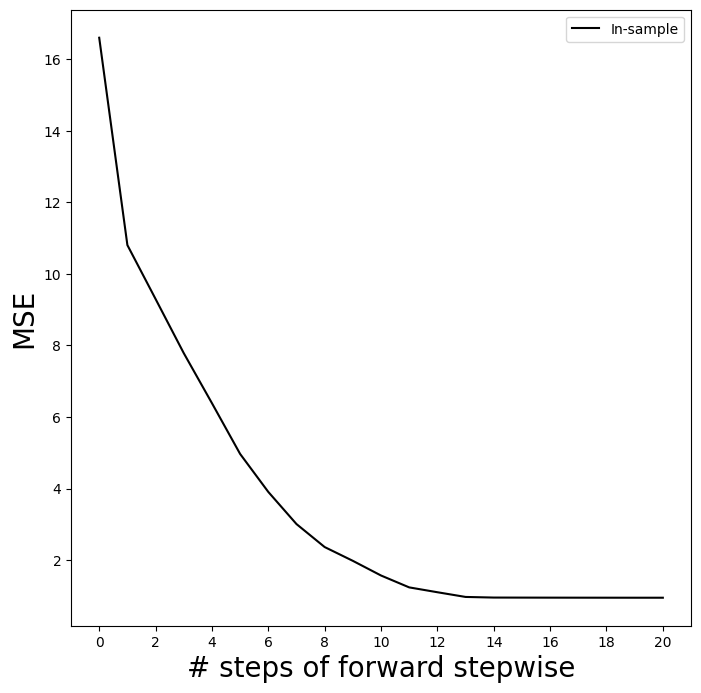

In [374]:
mse_fig,ax=subplots(figsize=(8,8))
insample_mse=((Y_hat_train-Y_train[:,None])**2).mean(0)
n_steps=insample_mse.shape[0]
ax.plot(np.arange(n_steps),
insample_mse ,
'k', # color black
label='In-sample')
ax.set_ylabel('MSE',
fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
# ax.set_ylim([50000,250000]);

# (d) TODO Plot the test set MSE associated with the best model of each size

In [375]:

Yhat_in=full_path.predict(X_test)
Yhat_in.shape

(100, 21)

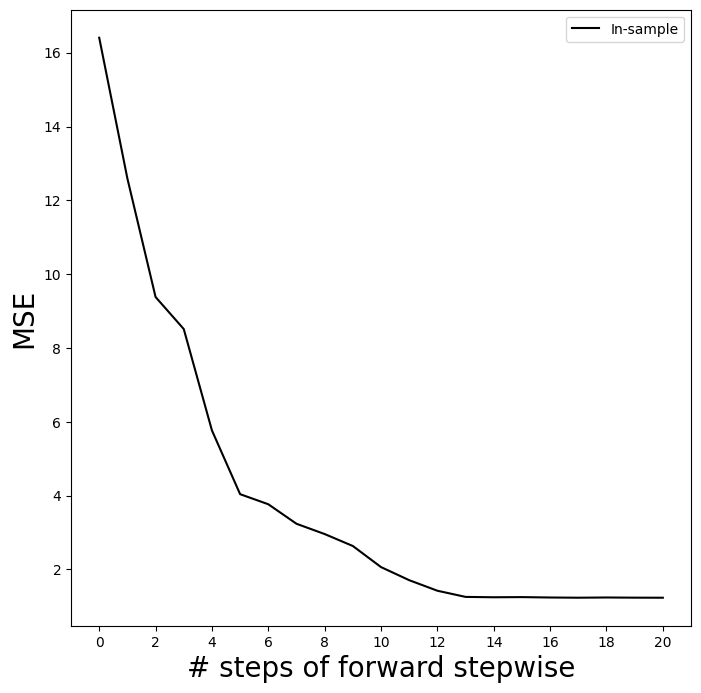

In [376]:
mse_fig,ax=subplots(figsize=(8,8))
insample_mse=((Yhat_in-Y_test[:,None])**2).mean(0)
n_steps=insample_mse.shape[0]
ax.plot(np.arange(n_steps),
insample_mse ,
'k', # color black
label='In-sample')
ax.set_ylabel('MSE',
fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
# ax.set_ylim([50000,250000]);

# (e) TODO For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

In [377]:
insample_mse

array([16.40624868, 12.59261422,  9.38151757,  8.51434574,  5.76703843,
        4.0401251 ,  3.76722391,  3.23870273,  2.95965315,  2.63619521,
        2.06465636,  1.71007033,  1.42422803,  1.25709403,  1.24739591,
        1.2516114 ,  1.24085491,  1.23543046,  1.24112688,  1.23656644,
        1.23493446])

In [378]:
np.argmin(insample_mse)

20

# (f) TODO How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.

In [379]:
beta

array([-1.22453081,  0.95751883, -0.3332963 , -0.11434911,  0.05071492,
       -1.33017027, -0.54609376, -2.20307521,  0.68769537, -0.78471744,
       -1.1121637 , -0.60001579,  1.10016439,  0.42311502,  1.46543134,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

# <small>real data has 15 features, model has 12 features</small>

# (g) TODO Create a plot displaying 
$$
\sqrt{\sum_{j=1}^{p} (\beta_j-\beta_j^{hat_r})^2}
$$
# is the jth coefficient estimate for the best model containing r coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?

# Confused: How can I get the model object?

In [380]:
# 找到有 r 个特征（不包括 intercept）的模型
r = 5

for i, (state, model, results) in enumerate(full_path.models_):
    num_features = len(state) - 1  # 减去 'intercept'
    if num_features == r:
        print(f"Found model at step {i + 1} with {r} features")
        print(f"Selected: {state}")
        print(f"Coefficients:\n{results.params}")
        break

Found model at step 7 with 5 features
Selected: (Feature(variables=('x0',), name='x0', encoder=None, use_transform=True, pure_columns=True, override_encoder_colnames=False), Feature(variables=('x10',), name='x10', encoder=None, use_transform=True, pure_columns=True, override_encoder_colnames=False), Feature(variables=('x12',), name='x12', encoder=None, use_transform=True, pure_columns=True, override_encoder_colnames=False), Feature(variables=('x14',), name='x14', encoder=None, use_transform=True, pure_columns=True, override_encoder_colnames=False), Feature(variables=('x5',), name='x5', encoder=None, use_transform=True, pure_columns=True, override_encoder_colnames=False), Feature(variables=('x7',), name='x7', encoder=None, use_transform=True, pure_columns=True, override_encoder_colnames=False))
Coefficients:
intercept    0.013583
x0          -1.163153
x10         -1.121135
x12          1.063500
x14          1.373180
x5          -1.339910
x7          -2.236763
dtype: float64


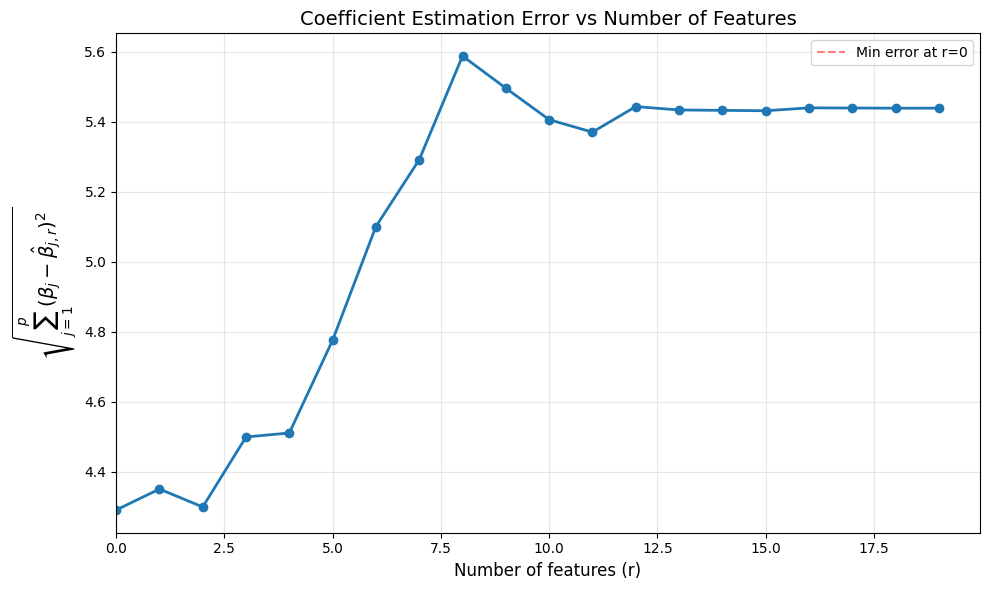

Minimum error: 4.2904 at r = 0
Error at r=15 (true model size): 5.430966112741684


In [381]:
# (g) 计算每个 r 值对应的系数估计误差
# 计算 sqrt(sum((beta_j - beta_hat_jr)^2)) 对于每个 r

# 获取特征列名（假设是 x1, x2, ..., x20）
# 需要根据你的实际数据调整
feature_names = [f'x{i}' for i in range(1, p+1)]  # 或者使用 X_train.columns

# 存储每个 r 值对应的误差
r_values = []
errors = []

# 遍历所有模型
for i, (state, model, results) in enumerate(full_path.models_):
    # state 是 Feature 对象的元组，每个 Feature 有 name 属性
    # 计算特征数量（不包括 intercept）
    num_features = len(state) - 1  # 减去 intercept
    
    if num_features < 0:  # 跳过无效状态
        continue
    
    # 初始化完整的系数向量（长度为 p）
    beta_hat_r = np.zeros(p)
    
    # 从 results.params 中提取系数
    params = results.params
    
    # 遍历 state 中的每个 Feature，提取系数
    for feat in state:
        if hasattr(feat, 'name') and feat.name != 'intercept':
            # 从特征名提取索引，例如 'x10' -> 9 (因为索引从0开始)
            try:
                # 提取数字部分
                feat_num = int(feat.name.replace('x', ''))
                # 转换为索引（x1 -> 0, x2 -> 1, ..., x20 -> 19）
                idx = feat_num - 1
                if 0 <= idx < p:
                    beta_hat_r[idx] = params[feat.name]
            except (ValueError, KeyError):
                # 如果无法解析特征名或系数不存在，跳过
                continue
    
    # 计算误差：sqrt(sum((beta_j - beta_hat_jr)^2))
    error = np.sqrt(np.sum((beta - beta_hat_r)**2))
    
    r_values.append(num_features)
    errors.append(error)

# 转换为 numpy 数组以便绘图
r_values = np.array(r_values)
errors = np.array(errors)

# 绘制图形
fig, ax = subplots(figsize=(10, 6))
ax.plot(r_values, errors, 'o-', linewidth=2, markersize=6)
ax.set_xlabel('Number of features (r)', fontsize=12)
ax.set_ylabel(r'$\sqrt{\sum_{j=1}^{p} (\beta_j - \hat{\beta}_{j,r})^2}$', fontsize=14)
ax.set_title('Coefficient Estimation Error vs Number of Features', fontsize=14)
ax.grid(True, alpha=0.3)
ax.set_xlim(left=0)

# 找到最小误差对应的 r
min_idx = np.argmin(errors)
min_r = r_values[min_idx]
min_error = errors[min_idx]
ax.axvline(x=min_r, color='r', linestyle='--', alpha=0.5, label=f'Min error at r={min_r}')
ax.legend()

plt.tight_layout()
plt.show()

# 打印一些统计信息
print(f"Minimum error: {min_error:.4f} at r = {min_r}")
print(f"Error at r=15 (true model size): {errors[r_values == 15][0] if 15 in r_values else 'N/A'}")

# 11

# We will now try to predict per capita crime rate in the Boston data set.

# (a) TODO Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

# Subset selection

In [382]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

In [383]:
boston=load_data('Boston')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [384]:
Y=np.array(boston['crim'])
Y

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [385]:
design=MS(boston.columns.drop('crim')).fit(boston)

design


,terms,"Index(['zn', ...type='object')"
,intercept,True
,categorical_features,None
,categorical_encoders,{}


In [386]:
X=design.transform(boston)
X

,intercept,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1.0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1.0,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,1.0,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,1.0,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,1.0,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,1.0,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,1.0,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,1.0,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [387]:
strategy=Stepwise.first_peak(
    design,
    direction='forward',
    max_terms=len(design.terms)
)


In [388]:
boston_MSE=sklearn_selected(OLS,strategy)
boston_MSE.fit(boston,Y)

boston_MSE.selected_state_

('age',
 'chas',
 'dis',
 'indus',
 'lstat',
 'medv',
 'nox',
 'ptratio',
 'rad',
 'rm',
 'tax',
 'zn')

In [389]:
strategy=Stepwise.fixed_steps(design,len(design.terms),direction='forward')

full_path=sklearn_selection_path(OLS,strategy)




In [390]:
full_path.fit(boston,Y)
Yhat_in=full_path.predict(boston)
Yhat_in.shape

(506, 13)

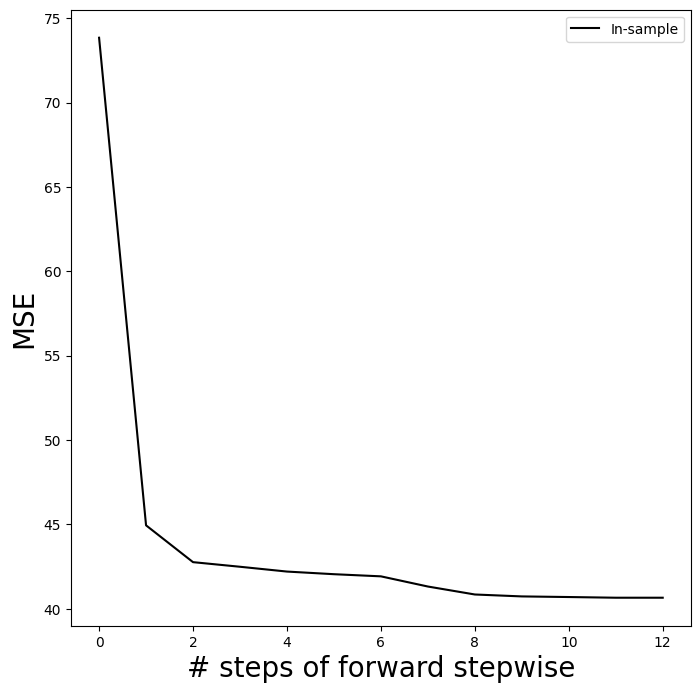

In [391]:
mse_fig,ax=subplots(figsize=(8,8))
insample_mse=((Yhat_in-Y[:,None])**2).mean(0)
n_steps=insample_mse.shape[0]
ax.plot(np.arange(n_steps),
insample_mse ,
'k', # color black
label='In-sample')
ax.set_ylabel('MSE',
fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
# ax.set_ylim([50000,250000]);

In [392]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)



In [393]:
X_train

,intercept,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
220,1.0,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307,17.4,9.71,26.7
71,1.0,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,9.88,21.7
240,1.0,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,11.38,22.0
6,1.0,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
417,1.0,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,26.64,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1.0,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287,19.6,11.74,18.5
192,1.0,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,2.87,36.4
117,1.0,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,10.30,19.2
47,1.0,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,18.80,16.6


In [394]:
Y_train

array([3.58090e-01, 1.58760e-01, 1.13290e-01, 8.82900e-02, 2.59406e+01,
       3.69695e+00, 4.52700e-02, 9.26600e-02, 1.22358e+00, 7.40389e+00,
       1.44550e-01, 1.30580e-01, 2.11240e-01, 1.35870e-01, 1.36781e+01,
       5.90050e-01, 1.15779e+01, 1.50100e-02, 6.91100e-02, 7.99248e+00,
       2.19770e-01, 2.39120e-01, 3.49400e-01, 9.84900e-02, 7.50300e-02,
       1.91330e-01, 1.03280e-01, 1.04690e-01, 8.71675e+00, 1.08342e+01,
       1.05740e-01, 1.20742e+00, 1.18123e+01, 1.31100e-02, 3.30450e-01,
       3.32105e+00, 1.90730e-01, 1.80846e+01, 2.36482e+01, 2.79570e-01,
       5.78000e-02, 5.36000e-02, 7.89600e-02, 6.71910e-01, 1.77800e-02,
       6.90500e-02, 7.36711e+00, 1.68118e+01, 4.92980e-01, 2.98500e-02,
       1.62864e+00, 1.14600e-01, 5.57780e-01, 6.46600e-02, 9.29900e-02,
       1.23247e+00, 1.35540e-01, 1.25179e+00, 1.51772e+01, 6.37960e-01,
       3.70500e-02, 4.62960e-01, 1.95100e-02, 2.41030e-01, 3.51140e-01,
       4.46200e-02, 4.54192e+00, 1.33598e+01, 1.43900e-02, 1.502

In [395]:
strategy=Stepwise.fixed_steps(design,len(design.terms),direction='forward')

full_path=sklearn_selection_path(OLS,strategy)




In [396]:
full_path.fit(X_train,Y_train)
Yhat_in=full_path.predict(X_test)
Yhat_in.shape

(102, 13)

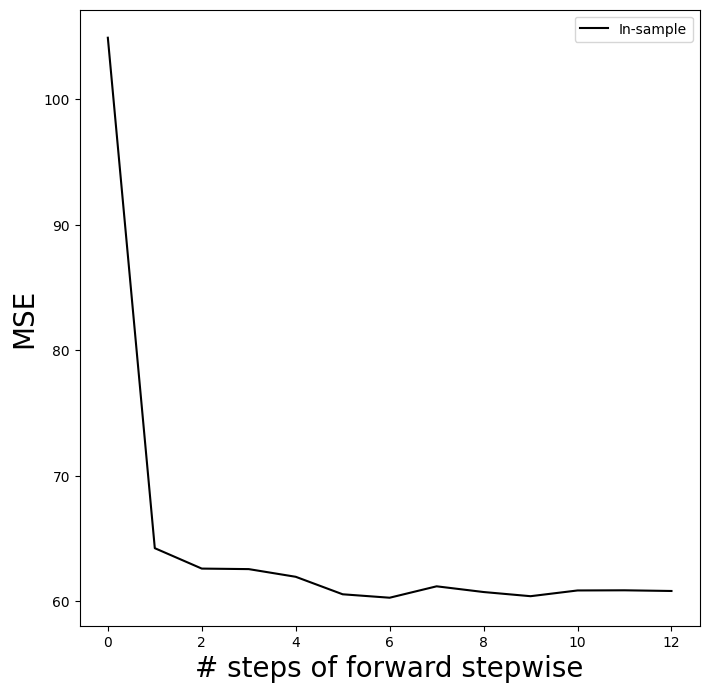

In [397]:
mse_fig,ax=subplots(figsize=(8,8))
insample_mse=((Yhat_in-Y_test[:,None])**2).mean(0)
n_steps=insample_mse.shape[0]
ax.plot(np.arange(n_steps),
insample_mse ,
'k', # color black
label='In-sample')
ax.set_ylabel('MSE',
fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
# ax.set_ylim([50000,250000]);

# Ridge Regression

In [398]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

In [399]:
kfold=KFold(n_splits=5,shuffle=True,random_state=0)



lambdas=np.logspace(-4,4,100)

ridge=Ridge()
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('ridge',ridge)
])

param_grid={'ridge__alpha':lambdas}

grid=GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=kfold,
    scoring='neg_mean_squared_error',
)

grid.fit(X_train,Y_train)
grid

,estimator,"Pipeline(step...e', Ridge())])"
,param_grid,{'ridge__alpha': array([1.0000...00000000e+04])}
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [400]:
results=grid.cv_results_

results

{'mean_fit_time': array([0.00134969, 0.00119815, 0.00118303, 0.00117822, 0.00117106,
        0.00116906, 0.00117078, 0.00116434, 0.00117679, 0.00115762,
        0.0011611 , 0.0011631 , 0.00116329, 0.00116343, 0.00115943,
        0.00116248, 0.00115848, 0.00116162, 0.00116339, 0.00116596,
        0.00116801, 0.00116234, 0.00116868, 0.0011703 , 0.00116572,
        0.0011692 , 0.00116348, 0.00116501, 0.0011663 , 0.00118551,
        0.00116706, 0.00116725, 0.00116053, 0.00116544, 0.00116282,
        0.0011683 , 0.00116339, 0.00116458, 0.00116262, 0.00115943,
        0.00116334, 0.00117183, 0.00116868, 0.00116844, 0.00117092,
        0.00116262, 0.00116472, 0.00115881, 0.00115385, 0.00116043,
        0.00117655, 0.00116558, 0.00116596, 0.00115952, 0.00116515,
        0.00116258, 0.00116153, 0.00116553, 0.00116334, 0.00116305,
        0.00116405, 0.00115829, 0.00115767, 0.00119185, 0.00115786,
        0.00115566, 0.00115557, 0.00115089, 0.0011591 , 0.00116215,
        0.00116158, 0.00115933,

In [401]:
mean_test_scores=-results['mean_test_score']

mean_test_scores

array([37.70205812, 37.7020574 , 37.70205653, 37.70205549, 37.70205423,
       37.70205271, 37.70205088, 37.70204868, 37.70204603, 37.70204284,
       37.702039  , 37.70203437, 37.70202879, 37.70202207, 37.70201398,
       37.70200423, 37.70199249, 37.70197836, 37.70196133, 37.70194083,
       37.70191613, 37.7018864 , 37.70185058, 37.70180746, 37.70175554,
       37.70169303, 37.70161777, 37.70152718, 37.70141814, 37.70128692,
       37.70112903, 37.70093911, 37.7007107 , 37.70043611, 37.70010611,
       37.69970971, 37.69923382, 37.69866289, 37.6979785 , 37.69715889,
       37.69617854, 37.69500759, 37.69361141, 37.69195015, 37.68997848,
       37.68764556, 37.68489541, 37.68166799, 37.67790113, 37.67353394,
       37.66851198, 37.6627949 , 37.65636722, 37.64925283, 37.64153366,
       37.63337271, 37.62504093, 37.6169465 , 37.60966431, 37.60396204,
       37.60081918, 37.60143537, 37.60722647, 37.6198092 , 37.64097879,
       37.67268591, 37.7170195 , 37.77619876, 37.8525733 , 37.94

In [402]:
std_test_scores=results['std_test_score']
std_test_scores

array([25.91941706, 25.91941814, 25.91941945, 25.91942102, 25.91942291,
       25.91942519, 25.91942794, 25.91943125, 25.91943523, 25.91944003,
       25.91944582, 25.91945278, 25.91946117, 25.91947127, 25.91948344,
       25.91949809, 25.91951575, 25.91953701, 25.91956262, 25.91959346,
       25.91963061, 25.91967536, 25.91972924, 25.91979414, 25.9198723 ,
       25.91996643, 25.92007978, 25.92021627, 25.92038062, 25.9205785 ,
       25.92081674, 25.92110353, 25.92144873, 25.92186419, 25.92236411,
       25.92296553, 25.92368891, 25.92455869, 25.92560416, 25.92686026,
       25.92836866, 25.93017892, 25.93234987, 25.93495108, 25.93806457,
       25.94178654, 25.94622927, 25.95152293, 25.9578172 , 25.96528256,
       25.97411087, 25.98451496, 25.99672665, 26.01099288, 26.02756924,
       26.04671058, 26.06865844, 26.09362539, 26.12177696, 26.1532123 ,
       26.1879454 , 26.22588892, 26.26684275, 26.31048925, 26.35639639,
       26.40403021, 26.45277765, 26.50198145, 26.55098838, 26.59

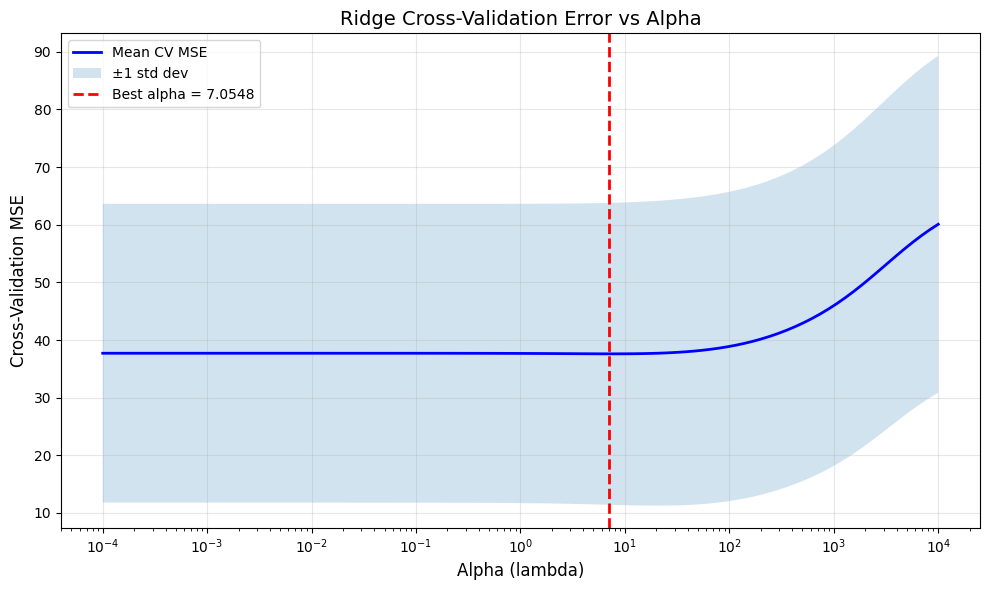

In [403]:
plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, mean_test_scores, 'b-', label='Mean CV MSE', linewidth=2)
plt.fill_between(lambdas, mean_test_scores - std_test_scores, 
                 mean_test_scores + std_test_scores, 
                 alpha=0.2, label='±1 std dev')
plt.axvline(grid.best_params_['ridge__alpha'], color='r', linestyle='--', 
           label=f'Best alpha = {grid.best_params_["ridge__alpha"]:.4f}', linewidth=2)
plt.xlabel('Alpha (lambda)', fontsize=12)
plt.ylabel('Cross-Validation MSE', fontsize=12)
plt.title('Ridge Cross-Validation Error vs Alpha', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [404]:
Y_pred=grid.predict(X_test)

In [405]:
test_mse=mean_squared_error(y_test,y_pred)

print(f"Test MSE of Ridge: {test_mse}")

Test MSE of Ridge: 1176083.977802855


In [406]:
Y_pred=grid.predict(X_test)
test_r2=r2_score(Y_test,Y_pred)
print(f"Test R²: {test_r2}")

Test R²: 0.41003082388870926


In [407]:
test_r2 = grid.best_estimator_.score(X_test, Y_test)
print(f"Test R²: {test_r2}")

Test R²: 0.41003082388870926


# Lasso

In [408]:
kfold=KFold(n_splits=5,shuffle=True,random_state=0)



lambdas=np.logspace(-4,4,100)

lasso=Lasso()
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('lasso',lasso)
])

param_grid={'lasso__alpha':lambdas}

grid=GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=kfold,
    scoring='neg_mean_squared_error',
)

grid.fit(X_train,Y_train)
grid

,estimator,"Pipeline(step...o', Lasso())])"
,param_grid,{'lasso__alpha': array([1.0000...00000000e+04])}
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [409]:
results=grid.cv_results_

results

{'mean_fit_time': array([0.00135522, 0.00123134, 0.00122685, 0.00122919, 0.00120616,
        0.00121703, 0.00121908, 0.00121932, 0.00121326, 0.00121589,
        0.00121083, 0.00120749, 0.00120077, 0.00120258, 0.00120716,
        0.00119877, 0.00120625, 0.00119386, 0.00121336, 0.0011888 ,
        0.0012032 , 0.00119295, 0.00118752, 0.00117688, 0.00117335,
        0.00117049, 0.00116796, 0.00117521, 0.00117459, 0.00117102,
        0.00117784, 0.0011734 , 0.00117116, 0.0011723 , 0.00116882,
        0.0011622 , 0.00116591, 0.00115752, 0.00116086, 0.00115628,
        0.00115008, 0.00114794, 0.00115023, 0.00115304, 0.0011497 ,
        0.00114183, 0.00114841, 0.00114717, 0.00114093, 0.0011394 ,
        0.00113502, 0.0011445 , 0.00115042, 0.00114074, 0.00114665,
        0.00114245, 0.00114045, 0.0011395 , 0.00113764, 0.00115237,
        0.00113945, 0.00114069, 0.00114045, 0.00114374, 0.00114336,
        0.00113797, 0.00114126, 0.00113616, 0.00113292, 0.00113215,
        0.00113783, 0.00112987,

In [410]:
mean_test_scores=-results['mean_test_score']

mean_test_scores

array([37.70168169, 37.70160456, 37.70150864, 37.70139627, 37.70125751,
       37.701094  , 37.70089691, 37.70065542, 37.70036962, 37.70002206,
       37.69960792, 37.69910632, 37.69850571, 37.69779007, 37.69689301,
       37.69586277, 37.69463122, 37.69317176, 37.69130999, 37.68926135,
       37.68699149, 37.68428874, 37.68117671, 37.67843369, 37.67441741,
       37.66982769, 37.66507376, 37.66027486, 37.65592401, 37.65232147,
       37.65099248, 37.6525489 , 37.65109617, 37.65413745, 37.66189328,
       37.68515333, 37.73101576, 37.81510825, 37.9222477 , 38.042249  ,
       38.17441487, 38.28642559, 38.3695759 , 38.45538315, 38.52226597,
       38.60791712, 38.71202606, 38.86021293, 39.09067605, 39.41599363,
       39.89364256, 40.58714833, 41.60595281, 43.13268804, 45.37586352,
       48.1124475 , 51.62338592, 56.728813  , 64.14995392, 66.34007919,
       66.34007919, 66.34007919, 66.34007919, 66.34007919, 66.34007919,
       66.34007919, 66.34007919, 66.34007919, 66.34007919, 66.34

In [411]:
std_test_scores=results['std_test_score']
std_test_scores

array([25.92032061, 25.92050852, 25.92073056, 25.92100171, 25.92132436,
       25.92171599, 25.9221863 , 25.92274998, 25.92343018, 25.92425022,
       25.92523259, 25.92641625, 25.92783786, 25.92954174, 25.93152623,
       25.93396922, 25.93691286, 25.9404548 , 25.94488612, 25.94998476,
       25.95639855, 25.96384397, 25.97276794, 25.98313576, 25.99596992,
       26.0117094 , 26.03001524, 26.05177748, 26.07801668, 26.10866056,
       26.14509889, 26.18688345, 26.22578701, 26.27067373, 26.32574826,
       26.38746853, 26.45694466, 26.54792357, 26.68120648, 26.85228773,
       27.03056443, 27.2017141 , 27.32790452, 27.40719399, 27.42532468,
       27.45396254, 27.49295454, 27.52556718, 27.55851531, 27.58934394,
       27.62934861, 27.68714144, 27.75920959, 27.82881525, 27.9055459 ,
       28.12236487, 28.4936154 , 29.04633312, 29.86642925, 29.58510644,
       29.58510644, 29.58510644, 29.58510644, 29.58510644, 29.58510644,
       29.58510644, 29.58510644, 29.58510644, 29.58510644, 29.58

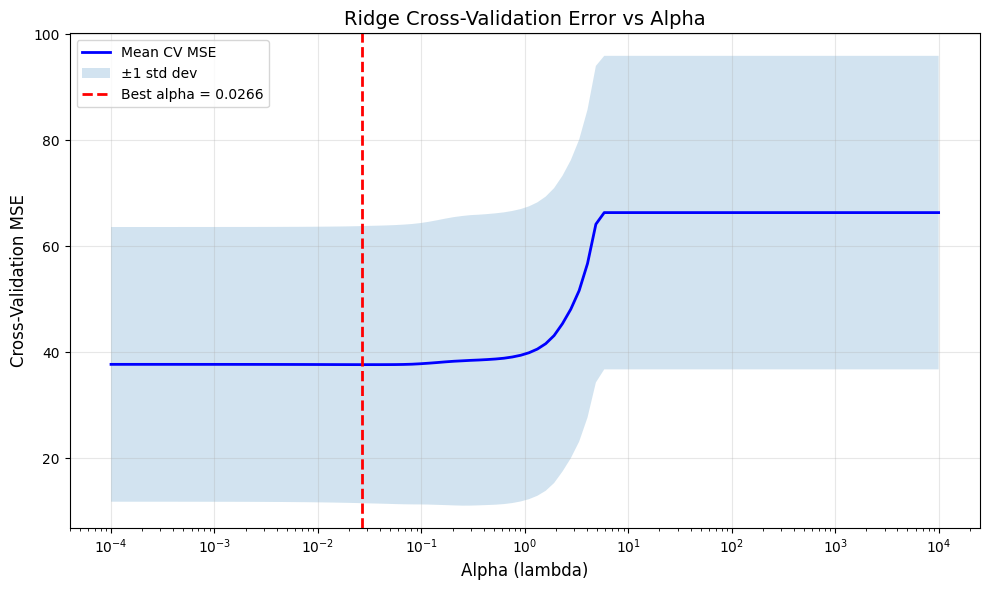

In [412]:
plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, mean_test_scores, 'b-', label='Mean CV MSE', linewidth=2)
plt.fill_between(lambdas, mean_test_scores - std_test_scores, 
                 mean_test_scores + std_test_scores, 
                 alpha=0.2, label='±1 std dev')
plt.axvline(grid.best_params_['lasso__alpha'], color='r', linestyle='--', 
           label=f'Best alpha = {grid.best_params_["lasso__alpha"]:.4f}', linewidth=2)
plt.xlabel('Alpha (lambda)', fontsize=12)
plt.ylabel('Cross-Validation MSE', fontsize=12)
plt.title('Ridge Cross-Validation Error vs Alpha', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [413]:
Y_pred=grid.predict(X_test)

In [414]:
test_mse=mean_squared_error(Y_test,Y_pred)

print(f"Test MSE of lasso: {test_mse}")

Test MSE of lasso: 60.821303998514644


In [415]:
Y_pred=grid.predict(X_test)
test_r2=r2_score(Y_test,Y_pred)
print(f"Test R²: {test_r2}")

Test R²: 0.4131131070492349


In [416]:
test_r2 = grid.best_estimator_.score(X_test, Y_test)
print(f"Test R²: {test_r2}")

Test R²: 0.4131131070492349


# PCR

# <small> Step1: PCA makes the dimension down.</small>
# <small> Step2: Use the main components to be new feature and do the regression.</small>

In [417]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



In [418]:
pipe=Pipeline([
    ('scaler',StandardScaler(with_mean=True,with_std=True)),
    ('pca',PCA()),
    ('lr',LinearRegression())
])

param_grid = {'pca__n_components': np.arange(1, X_train.shape[1] + 1)}

gcv=GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')

gcv.fit(X_train,Y_train)

gcv

,estimator,Pipeline(step...egression())])
,param_grid,"{'pca__n_components': array([ 1, 2..., 11, 12, 13])}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [419]:
gcv.cv_results_

{'mean_fit_time': array([0.00150065, 0.00136566, 0.00135937, 0.00136309, 0.00136094,
        0.00137258, 0.0013732 , 0.00138106, 0.00137949, 0.0013844 ,
        0.001439  , 0.0014051 , 0.00139575]),
 'std_fit_time': array([2.41223638e-04, 1.10786421e-05, 9.76014729e-06, 9.46662878e-06,
        4.93336378e-06, 9.64461355e-06, 8.21572573e-06, 1.02797952e-05,
        5.92123473e-06, 3.04429811e-06, 7.12163280e-05, 9.39816886e-06,
        2.66943646e-06]),
 'mean_score_time': array([0.0005877 , 0.00056758, 0.000564  , 0.00057011, 0.00056505,
        0.0005621 , 0.00056424, 0.00056944, 0.00056696, 0.000565  ,
        0.00057397, 0.00057025, 0.00056944]),
 'std_score_time': array([2.43327156e-05, 2.60564348e-06, 2.76647753e-06, 1.21339833e-05,
        4.12953092e-06, 4.17225701e-06, 3.62396240e-06, 1.09761658e-05,
        3.24459569e-06, 4.88705749e-06, 8.74785026e-06, 3.02105600e-06,
        4.20212323e-06]),
 'param_pca__n_components': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 

In [420]:
mean_test_scores=-results['mean_test_score']

mean_test_scores

array([37.70168169, 37.70160456, 37.70150864, 37.70139627, 37.70125751,
       37.701094  , 37.70089691, 37.70065542, 37.70036962, 37.70002206,
       37.69960792, 37.69910632, 37.69850571, 37.69779007, 37.69689301,
       37.69586277, 37.69463122, 37.69317176, 37.69130999, 37.68926135,
       37.68699149, 37.68428874, 37.68117671, 37.67843369, 37.67441741,
       37.66982769, 37.66507376, 37.66027486, 37.65592401, 37.65232147,
       37.65099248, 37.6525489 , 37.65109617, 37.65413745, 37.66189328,
       37.68515333, 37.73101576, 37.81510825, 37.9222477 , 38.042249  ,
       38.17441487, 38.28642559, 38.3695759 , 38.45538315, 38.52226597,
       38.60791712, 38.71202606, 38.86021293, 39.09067605, 39.41599363,
       39.89364256, 40.58714833, 41.60595281, 43.13268804, 45.37586352,
       48.1124475 , 51.62338592, 56.728813  , 64.14995392, 66.34007919,
       66.34007919, 66.34007919, 66.34007919, 66.34007919, 66.34007919,
       66.34007919, 66.34007919, 66.34007919, 66.34007919, 66.34

In [421]:
std_test_scores=results['std_test_score']
std_test_scores

array([25.92032061, 25.92050852, 25.92073056, 25.92100171, 25.92132436,
       25.92171599, 25.9221863 , 25.92274998, 25.92343018, 25.92425022,
       25.92523259, 25.92641625, 25.92783786, 25.92954174, 25.93152623,
       25.93396922, 25.93691286, 25.9404548 , 25.94488612, 25.94998476,
       25.95639855, 25.96384397, 25.97276794, 25.98313576, 25.99596992,
       26.0117094 , 26.03001524, 26.05177748, 26.07801668, 26.10866056,
       26.14509889, 26.18688345, 26.22578701, 26.27067373, 26.32574826,
       26.38746853, 26.45694466, 26.54792357, 26.68120648, 26.85228773,
       27.03056443, 27.2017141 , 27.32790452, 27.40719399, 27.42532468,
       27.45396254, 27.49295454, 27.52556718, 27.55851531, 27.58934394,
       27.62934861, 27.68714144, 27.75920959, 27.82881525, 27.9055459 ,
       28.12236487, 28.4936154 , 29.04633312, 29.86642925, 29.58510644,
       29.58510644, 29.58510644, 29.58510644, 29.58510644, 29.58510644,
       29.58510644, 29.58510644, 29.58510644, 29.58510644, 29.58

In [422]:
results = gcv.cv_results_
n_components = results['param_pca__n_components'].data  # 主成分个数
mean_test_scores = -results['mean_test_score']  # MSE（取负号，因为scoring='neg_mean_squared_error'）
std_test_scores = results['std_test_score']  # 标准差

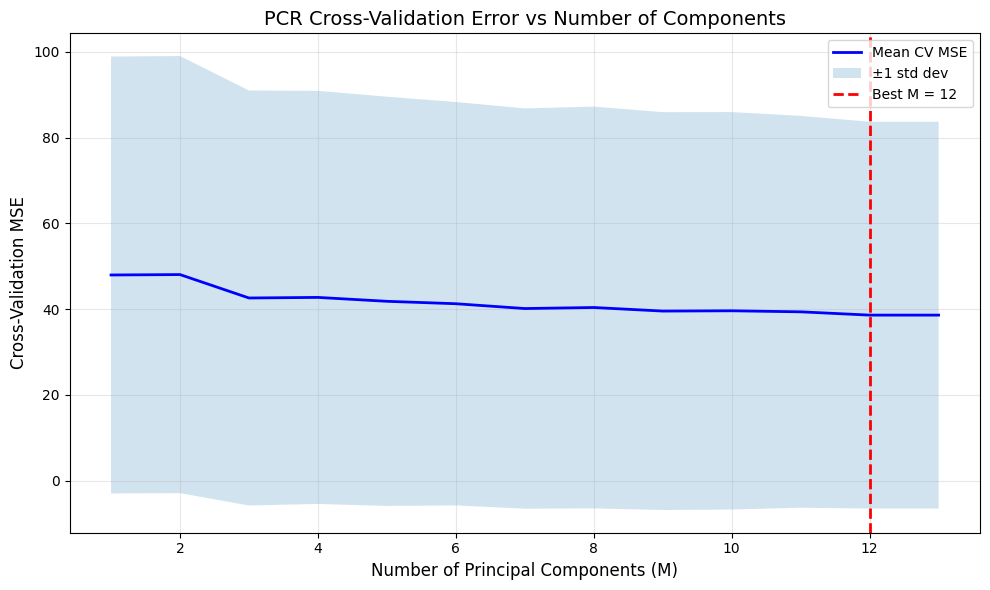

In [423]:
plt.figure(figsize=(10, 6))
plt.plot(n_components, mean_test_scores, 'b-', label='Mean CV MSE', linewidth=2)
plt.fill_between(n_components, mean_test_scores - std_test_scores, 
                 mean_test_scores + std_test_scores, 
                 alpha=0.2, label='±1 std dev')
plt.axvline(gcv.best_params_['pca__n_components'], color='r', linestyle='--', 
           label=f'Best M = {gcv.best_params_["pca__n_components"]}', linewidth=2)
plt.xlabel('Number of Principal Components (M)', fontsize=12)
plt.ylabel('Cross-Validation MSE', fontsize=12)
plt.title('PCR Cross-Validation Error vs Number of Components', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [424]:
Y_pred=gcv.predict(X_test)

In [ ]:
test_mse=mean_squared_error(Y_test,Y_pred)

print(f"Test MSE of PCR: {test_mse}")

Test MSE of lasso: 60.834493529442916


In [426]:
Y_pred=gcv.predict(X_test)
test_r2=r2_score(Y_test,Y_pred)
print(f"Test R²: {test_r2}")

Test R²: 0.41298583646611553


In [427]:
test_r2 = gcv.best_estimator_.score(X_test, Y_test)
print(f"Test R²: {test_r2}")

Test R²: 0.41298583646611553


# (b) TODO Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, cross validation, or some other reasonable alternative, as opposed to using training error.

# <small>We can see that Ridge and Lasso have the same R^2 on test set.</small>

# (c) TODO Does your chosen model involve all of the features in the data set? Why or why not?

In [428]:
grid.best_estimator_.named_steps['lasso'].coef_

array([ 0.        ,  0.83314807, -0.47569236, -0.20125545, -0.77103066,
        0.71800237, -0.3123375 , -1.72223977,  4.55634107, -0.24767731,
       -0.51351596,  1.3856391 , -1.80806119])

# Yes, all coefficients of the feature are not zero. That means all features are involved.